In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# from pandas_datareader import data as pdr
# import yfinance
# import datetime
# import pandas as pd

# def get(tickers, startdate, enddate):
#     def data(ticker):
#         return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
#     datas = map (data, tickers)
#     return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

# tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
# all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
# all_data.head()

In [3]:
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

In [4]:
def save_moving_avg(stock_df, window_size=40):
    print('Calculating moving average for window size of ' + str(window_size))
    adj_close_px=stock_df['Adj Close']
    # Calculate the moving average
    moving_avg = adj_close_px.rolling(window=window_size).mean()

    # Inspect the result
    # print(moving_avg[-10:])
    moving_avg.plot()
    save_path='moving_avg_' + str(window_size) +  '.png'
    print('Saving figure to path to ' + save_path)
    
    plt.savefig(save_path)
    plt.clf()

save_moving_avg(aapl, 50)
save_moving_avg(aapl, 250)    
save_moving_avg(aapl)


Calculating moving average for window size of 50
Saving figure to path to moving_avg_50.png
Calculating moving average for window size of 250
Saving figure to path to moving_avg_250.png
Calculating moving average for window size of 40
Saving figure to path to moving_avg_40.png


<Figure size 432x288 with 0 Axes>

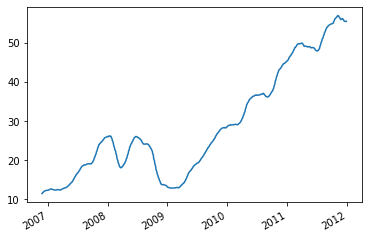

In [5]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
# print(moving_avg[-10:])
moving_avg.plot()

# Isolate the adjusted closing prices 

adj_close_px = aapl['Adj Close']

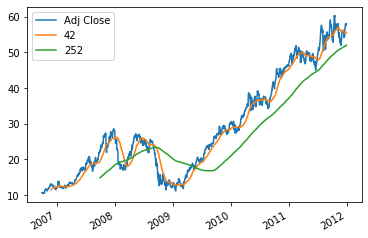

In [6]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()
# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()
# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()
plt.show()

# Volatility Calculation

In [7]:
# ### Get Adj Close for MSFT and AAPL
# # aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

# import quandl 
# msft = quandl.get("WIKI/MSFT", start_date="2006-10-01", end_date="2012-01-01")
# msft.head()
# print(msft.loc['2007-01-01':'2007-01-31'])
# # aapl.describe()

In [8]:
# import yfinance as yf

# tickerData = yf.Ticker('MSFT')
# tickerDf = tickerData.history(period='1d', start='2006-10-1', end='2012-1-1')

# print(tickerDf)

In [9]:
import yfinance as yf

def get_data(tickerSymbol):
    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)
    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start='2006-10-1', end='2012-1-1')

    return tickerDf


msft = get_data('MSFT')
print(msft.head())

aapl = get_data("AAPL")
print(aapl.head())

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2006-10-02  19.979349  20.103672  19.855027  20.008602  52908100        0.0   
2006-10-03  20.015917  20.096360  19.898906  20.015917  39386200        0.0   
2006-10-04  20.030540  20.447385  20.015915  20.432760  82191200        0.0   
2006-10-05  20.418131  20.557080  20.315748  20.418131  81967200        0.0   
2006-10-06  20.301119  20.476633  20.220674  20.381563  36452200        0.0   

            Stock Splits  
Date                      
2006-10-02             0  
2006-10-03             0  
2006-10-04             0  
2006-10-05             0  
2006-10-06             0  
                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2006-10-02  2.306382  2.330029  2.281813  2.299011  712639200          0   
2006-10-03  2.286421  2.30177

In [25]:
aapl_returns = np.log(aapl['Close'] / aapl['Close'].shift(1))
# aapl_returns.head()
msft_returns = np.log(msft['Close'] / msft['Close'].shift(1))
# msft_returns.head()

return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

In [33]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries
# from pandas.core import datetools

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# number of observations 
return_data.info()

print('______________________________________________________________________________________________________\n')

# Print the summary
print(model.summary())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1322 entries, 2006-10-03 to 2011-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1322 non-null   float64
 1   MSFT    1322 non-null   float64
dtypes: float64(2)
memory usage: 31.0 KB
______________________________________________________________________________________________________

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.33e-96
Time:                        14:41:42   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                 

(-0.2138532071328529, 0.14657733564032532, -0.1393383355076552, 0.185385920886002)
x= [-0.21385321 -0.20649748 -0.19914176 -0.19178603 -0.18443031 -0.17707458
 -0.16971885 -0.16236313 -0.1550074  -0.14765168 -0.14029595 -0.13294023
 -0.1255845  -0.11822878 -0.11087305 -0.10351733 -0.0961616  -0.08880588
 -0.08145015 -0.07409443 -0.0667387  -0.05938297 -0.05202725 -0.04467152
 -0.0373158  -0.02996007 -0.02260435 -0.01524862 -0.0078929  -0.00053717
  0.00681855  0.01417428  0.02153     0.02888573  0.03624146  0.04359718
  0.05095291  0.05830863  0.06566436  0.07302008  0.08037581  0.08773153
  0.09508726  0.10244298  0.10979871  0.11715443  0.12451016  0.13186588
  0.13922161  0.14657734]
y= [-0.09476145 -0.09152001 -0.08827856 -0.08503712 -0.08179568 -0.07855424
 -0.07531279 -0.07207135 -0.06882991 -0.06558847 -0.06234703 -0.05910558
 -0.05586414 -0.0526227  -0.04938126 -0.04613981 -0.04289837 -0.03965693
 -0.03641549 -0.03317405 -0.0299326  -0.02669116 -0.02344972 -0.02020828
 -0.01696

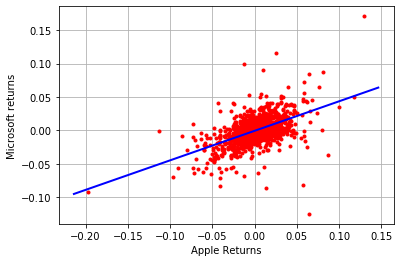

In [12]:
import matplotlib.pyplot as plt

plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
print(ax)
x = np.linspace(ax[0], ax[1])
# x = np.array([-0.1, 0.12])
y = model.params[0] + model.params[1] * x
print("x=", x)
print("y=", y)
plt.plot(x, y, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

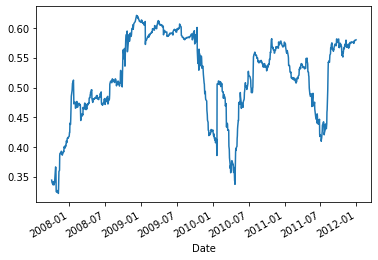

In [13]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

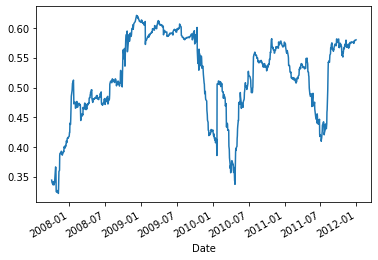

In [14]:
def save_correlation(stock_df1, stock_df2):
    cor = stock_df2.rolling(window=252).corr(stock_df1)
    cor.plot()
    
    plt.savefig('corr.png')
    
save_correlation(aapl_returns, msft_returns)

#### Building A Trading Strategy With Python
Trading Strategy: If short_moving_average is greater than long_moving_average -> buy

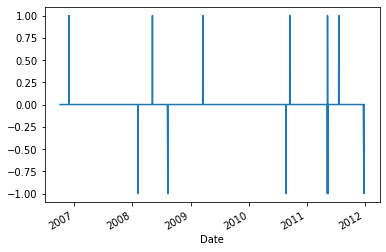

In [15]:
def get_trading_strategy_signals(stock_df, short_window = 40, long_window = 100):
    # Initialize the `signals` DataFrame with the `signal` column
    signals = pd.DataFrame(index=stock_df.index)
    signals['signal'] = 0.0

    # Create short simple moving average over the short window
    signals['short_mavg'] = stock_df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average over the long window
    signals['long_mavg'] = stock_df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)   
    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    signals[['short_mavg', 'long_mavg', 'signal']].plot()
#     plt.show()
    plt.savefig('trading_strategy_signals.png')
    
    plt.clf()
    
    signals['positions'].plot()
#     plt.show()
    plt.savefig('trading_strategy_positions.png')

    return signals

signals= get_trading_strategy_signals(aapl)



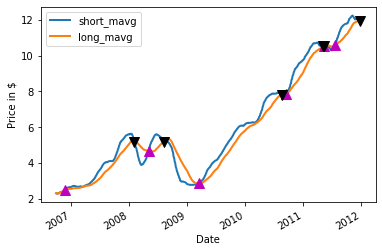

In [34]:
def analyze_strategy(stock_df, signals):

    # Initialize the plot figure
    fig = plt.figure()

    # Add a subplot and label for y-axis
    ax1 = fig.add_subplot(111,  ylabel='Price in $')

#     # Plot the closing price
#     stock_df['Close'].plot(ax=ax1, color='r', lw=2.)

    # Plot the short and long moving averages
    signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

    # Plot the buy signals
    ax1.plot(signals.loc[signals.positions == 1.0].index, 
             signals.short_mavg[signals.positions == 1.0],
             '^', markersize=10, color='m')

    # Plot the sell signals
    ax1.plot(signals.loc[signals.positions == -1.0].index, 
             signals.short_mavg[signals.positions == -1.0],
             'v', markersize=10, color='k')
    # Show the plot
#     plt.show()
    plt.savefig('buy-sell_signals.png')

 
analyze_strategy(aapl, signals)

In [17]:
import pandas as pd

signals.to_excel('signals.xlsx')
aapl.to_excel('aapl_df.xlsx')

# Backtesting A Strategy
Implementation Of A Simple Backtester With Pandas

In [18]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()
print(pos_diff)

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Close'], axis=0)).sum(axis=1)

print("Cumulative Sum:")
print((portfolio['holdings']).cumsum())

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (portfolio['holdings']).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

print(portfolio.tail())
print(signals.tail())

             AAPL
Date             
2006-10-02    NaN
2006-10-03    0.0
2006-10-04    0.0
2006-10-05    0.0
2006-10-06    0.0
...           ...
2011-12-23    0.0
2011-12-27 -100.0
2011-12-28    0.0
2011-12-29    0.0
2011-12-30    0.0

[1323 rows x 1 columns]
Cumulative Sum:
Date
2006-10-02         0.000000
2006-10-03         0.000000
2006-10-04         0.000000
2006-10-05         0.000000
2006-10-06         0.000000
                  ...      
2011-12-23    665747.009301
2011-12-27    665747.009301
2011-12-28    665747.009301
2011-12-29    665747.009301
2011-12-30    665747.009301
Name: holdings, Length: 1323, dtype: float64
                   AAPL     holdings           cash          total   returns
Date                                                                        
2011-12-23  1238.659477  1238.659477 -565747.009301 -564508.349824  0.002173
2011-12-27     0.000000     0.000000 -565747.009301 -565747.009301  0.002194
2011-12-28     0.000000     0.000000 -565747.009301 -565747

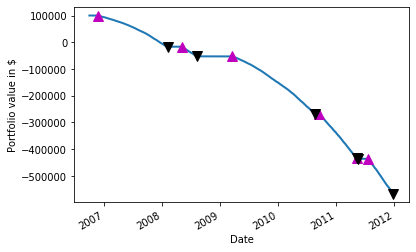

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

# Evaluating Moving Average Crossover Strategy
Sharpe Ratio

In [20]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.3159576670734629


Maximum Drawdown

In [21]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

KeyError: 'Adj Close'